
Model Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        27
           1       0.39      0.50      0.44        14

    accuracy                           0.56        41
   macro avg       0.54      0.55      0.54        41
weighted avg       0.59      0.56      0.57        41


============================== DECISION TREE PREDICTIONS ==============================

Player: Ash
  Move Predictions & Results:
    Move 1: 3 -> Invalid placement
    Move 2: 9 -> Correct placement
    Move 3: 8 -> Correct placement
    Move 4: 7 -> Correct placement
    Move 5: 3 -> Invalid placement
    Move 6: 2 -> Invalid placement
    Move 7: 5 -> Correct placement
    Move 8: 4 -> Invalid placement
    Move 9: 10 -> Correct placement
    Move 10: 6 -> Correct placement

Player: Mithi
  Move Predictions & Results:
    Move 1: 12 -> Invalid placement
    Move 2: 5 -> Correct placement
    Move 3: 5 -> Correct pl

C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning:

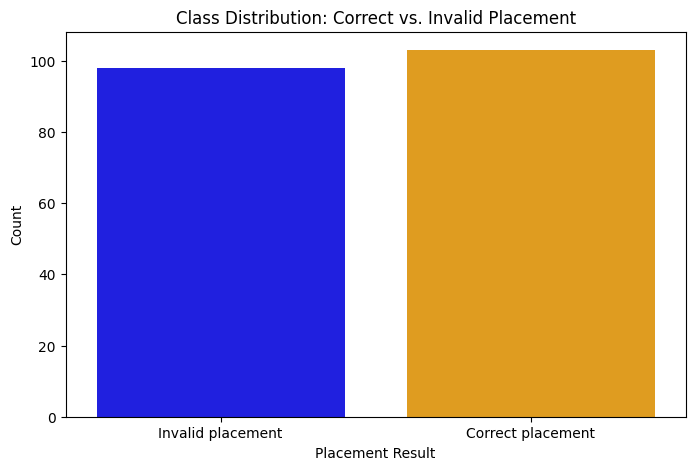

<Figure size 1200x600 with 0 Axes>

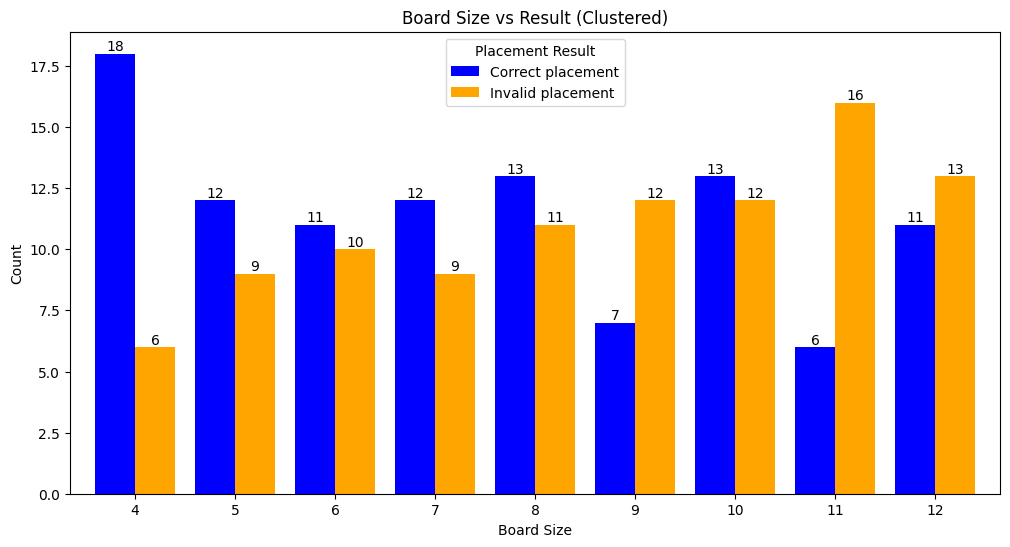

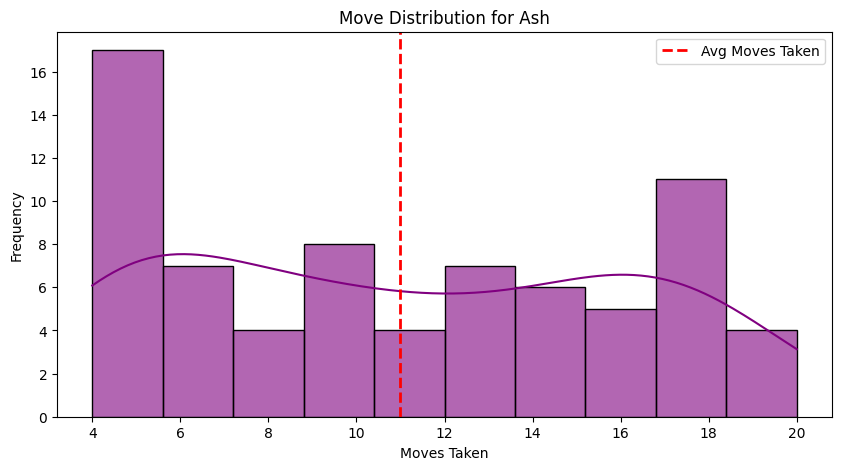

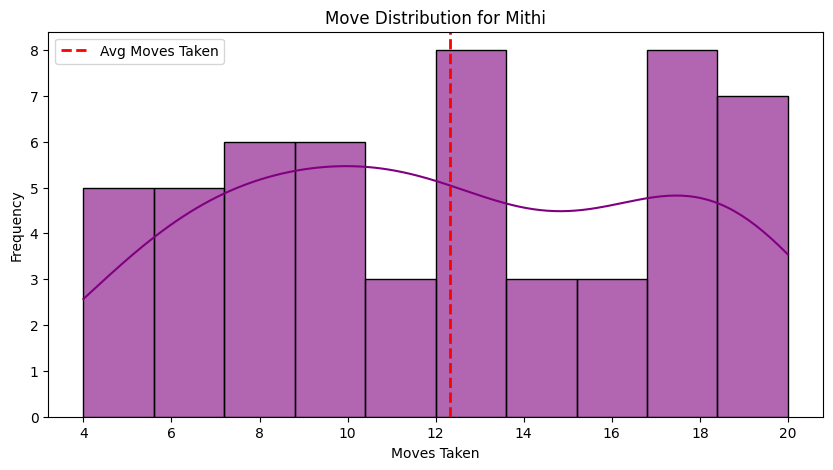

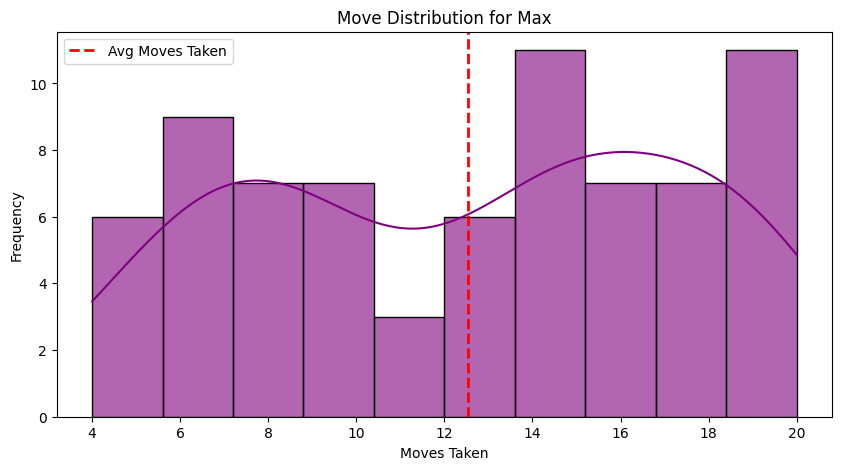

C:\Users\ashwi\AppData\Local\Temp\ipykernel_13808\3149871141.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data["Solution Status Label"] = player_data["Solution Status"].map({0: "Correct placement", 1: "Invalid placement"})


<Figure size 1000x500 with 0 Axes>

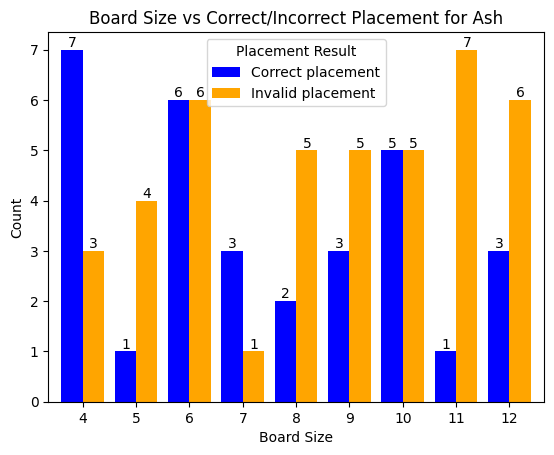

C:\Users\ashwi\AppData\Local\Temp\ipykernel_13808\3149871141.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data["Solution Status Label"] = player_data["Solution Status"].map({0: "Correct placement", 1: "Invalid placement"})


<Figure size 1000x500 with 0 Axes>

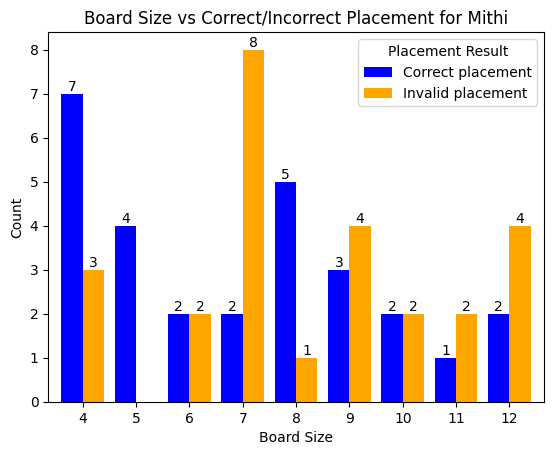

C:\Users\ashwi\AppData\Local\Temp\ipykernel_13808\3149871141.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data["Solution Status Label"] = player_data["Solution Status"].map({0: "Correct placement", 1: "Invalid placement"})


<Figure size 1000x500 with 0 Axes>

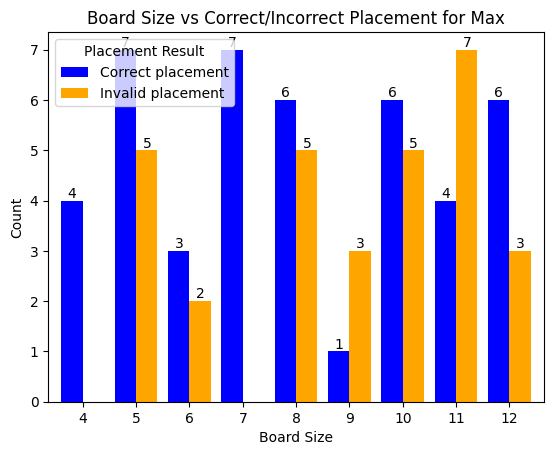

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# **Load the CSV file**
file_path = "E:/Review2 godot projects_AshwinRavi/Dataset/NQueens_2.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# **Preprocess the dataset**
df.columns = df.columns.str.strip()  # Clean column names
df.rename(columns={"Player Name": "Player", "Board Size": "Disks", "Result": "Solution Status"}, inplace=True)

# **Encode categorical variables**
le_player = LabelEncoder()
df["Player"] = le_player.fit_transform(df["Player"])

le_status = LabelEncoder()
df["Solution Status"] = le_status.fit_transform(df["Solution Status"])

# **Feature Engineering**
df["Moves Ratio"] = df["Moves Taken"] / (df["Disks"] + 1)  
df["Move Difference"] = df["Moves Taken"] - df["Disks"]  

# **Select features and target for move prediction**
X_moves = df[["Player", "Disks", "Moves Taken", "Moves Ratio", "Move Difference"]]
y_moves = df["Moves Taken"]

# **Select features and target for result prediction**
X_result = df[["Disks", "Moves Taken"]]
y_result = df["Solution Status"]

# **Scale numeric data**
scaler_moves = StandardScaler()
X_moves_scaled = scaler_moves.fit_transform(X_moves)

scaler_result = StandardScaler()
X_result_scaled = scaler_result.fit_transform(X_result)

# **Train-Test Split**
X_moves_train, X_moves_test, y_moves_train, y_moves_test = train_test_split(X_moves_scaled, y_moves, test_size=0.2, random_state=42)
X_result_train, X_result_test, y_result_train, y_result_test = train_test_split(X_result_scaled, y_result, test_size=0.2, random_state=42)

# **Train Decision Tree Models**
dt_move_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_move_model.fit(X_moves_train, y_moves_train)

dt_result_model = DecisionTreeClassifier(random_state=42)
dt_result_model.fit(X_result_train, y_result_train)

# **Evaluate Result Prediction Model**
y_result_pred = dt_result_model.predict(X_result_test)
accuracy = accuracy_score(y_result_test, y_result_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_result_test, y_result_pred))

# **Get unique players**
unique_players = df["Player"].unique()

# **Generate Predictions**
print("\n" + "=" * 30 + " DECISION TREE PREDICTIONS " + "=" * 30)

for player in unique_players:
    # **Get latest move data**
    player_latest_moves = df[df["Player"] == player].tail(1)[X_moves.columns].values
    if player_latest_moves.shape[0] == 0:
        continue  

    # **Scale latest move**
    player_latest_moves_scaled = scaler_moves.transform(player_latest_moves)
    
    player_latest_result_scaled = scaler_result.transform(player_latest_moves[:, [1, 2]])

    dt_preds = []
    dt_results = []

    for _ in range(10):
        # **Predict next move**
        dt_next_move = int(abs(dt_move_model.predict([player_latest_moves_scaled[0]])[0]))

        # **Add randomness for dynamic predictions**
        noise = np.random.randint(-3, 8)  
        dt_next_move += noise  

        # **Ensure values are non-negative & realistic**
        board_size = player_latest_moves[0][1]  
        max_limit = int(board_size * 1.5)  
        dt_next_move = max(1, min(dt_next_move, max_limit))  

        dt_preds.append(dt_next_move)

        # **Predict placement result using Decision Tree Classifier**
        player_latest_result_scaled[0][1] = dt_next_move  
        player_latest_result_scaled = scaler_result.transform(player_latest_result_scaled)

        dt_result = dt_result_model.predict(player_latest_result_scaled)[0]
        dt_results.append(le_status.inverse_transform([dt_result])[0])

        # **Update input dynamically**
        player_latest_moves_scaled[0][2] += dt_next_move * np.random.uniform(0.3, 0.8)
        player_latest_moves_scaled[0] = scaler_moves.transform([player_latest_moves_scaled[0]])[0]

    # **Convert player ID back to name**
    player_name = le_player.inverse_transform([player])[0]

    # **Display Output in Structured List Format**
    print(f"\nPlayer: {player_name}")
    print("  Move Predictions & Results:")
    for i in range(10):
        print(f"    Move {i+1}: {dt_preds[i]} -> {dt_results[i]}")

# **1️⃣ Class Distribution Visualization**
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Solution Status"].map({0: "Correct placement", 1: "Invalid placement"}), palette=["blue", "orange"])
plt.title("Class Distribution: Correct vs. Invalid Placement")
plt.xlabel("Placement Result")
plt.ylabel("Count")
plt.show()

# **Board Size vs. Result (Clustered by Board Size)**
plt.figure(figsize=(12, 6))

# Convert numeric Solution Status back to labels
df["Solution Status Label"] = df["Solution Status"].map({0: "Correct placement", 1: "Invalid placement"})

# Group by Board Size and Result to count occurrences
board_size_result = df.groupby(["Disks", "Solution Status Label"]).size().unstack(fill_value=0)

# Create the bar chart with grouped bars
board_size_result.plot(kind='bar', figsize=(12, 6), color=["blue", "orange"], width=0.8)

# Add title and labels
plt.title("Board Size vs Result (Clustered)")
plt.xlabel("Board Size")
plt.ylabel("Count")
plt.legend(title="Placement Result")
plt.xticks(rotation=0)

# **Display Values on Bars**
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero values
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10)

plt.show()


# **3️⃣ Individual Player Statistics**
for player in unique_players:
    player_name = le_player.inverse_transform([player])[0]
    player_data = df[df["Player"] == player]

    plt.figure(figsize=(10, 5))
    sns.histplot(player_data["Moves Taken"], bins=10, kde=True, color="purple", alpha=0.6)
    plt.axvline(player_data["Moves Taken"].mean(), color='red', linestyle='dashed', linewidth=2, label="Avg Moves Taken")
    
    plt.title(f"Move Distribution for {player_name}")
    plt.xlabel("Moves Taken")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()



# **Get unique players**
unique_players = df["Player"].unique()

# **Create individual charts for each player**
for player in unique_players:
    player_name = le_player.inverse_transform([player])[0]  # Convert ID to name
    player_data = df[df["Player"] == player]  # Filter data for player

    # Convert numeric Solution Status back to labels
    player_data["Solution Status Label"] = player_data["Solution Status"].map({0: "Correct placement", 1: "Invalid placement"})

    # Group by Board Size and Result to count occurrences
    board_size_result = player_data.groupby(["Disks", "Solution Status Label"]).size().unstack(fill_value=0)

    # **Create a bar chart for this player**
    plt.figure(figsize=(10, 5))
    board_size_result.plot(kind='bar', width=0.8, color=["blue", "orange"])

    # Add title and labels
    plt.title(f"Board Size vs Correct/Incorrect Placement for {player_name}")
    plt.xlabel("Board Size")
    plt.ylabel("Count")
    plt.legend(title="Placement Result")
    plt.xticks(rotation=0)

    # **Display Values on Bars**
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate non-zero values
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), 
                        ha='center', va='bottom', fontsize=10)

    plt.show()
